### PROBLEM STATEMENT

In [9]:
#What is the most frequent gener of movies released on netflix?
#which has highest vote in vote avg columns?
#Which movie got the heighest popularity?whats its gener?
#Which movies got the lowest popularity?whats its gener?
#which year has the most filmmed movies?

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv("mymoviedb.csv", engine='python', on_bad_lines='skip')
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9832,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9833,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9834,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9835,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


In [15]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [17]:
df.tail()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
9832,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9833,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9834,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9835,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
9836,1984-09-23,Threads,Documentary style account of a nuclear holocau...,13.354,186,7.8,en,"War, Drama, Science Fiction",https://image.tmdb.org/t/p/original/lBhU4U9Eeh...


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [21]:
df.isnull().sum()

Release_Date          0
Title                 9
Overview              9
Popularity           10
Vote_Count           10
Vote_Average         10
Original_Language    10
Genre                11
Poster_Url           11
dtype: int64

In [23]:
df.duplicated().sum()

0

In [25]:
df.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


In [27]:
# df['Vote_Average']=df['Vote_Average'].fillna("mean")
# df['Popularity']=df['Popularity'].fillna('mean')
# df['Vote_Count']=df['Vote_Count'].fillna('mean')

In [29]:
df.isnull().sum()

Release_Date          0
Title                 9
Overview              9
Popularity           10
Vote_Count           10
Vote_Average         10
Original_Language    10
Genre                11
Poster_Url           11
dtype: int64

In [31]:
df['Vote_Average'] = pd.to_numeric(df["Vote_Average"],errors="coerce").astype('float64')
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce').astype('float64')
# df['Release_Date'] = pd.to_numeric(df['Release_Date'], errors='coerce').astype('float64')
print(df["Vote_Average"].dtypes)

float64


df = df.apply(pd.to_numeric, errors='ignore')
df

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9826 non-null   float64
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(3), object(6)
memory usage: 691.8+ KB


In [36]:
df["Genre"].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [38]:
# #Exploration summery
# * We have a dataframe consist of 9827 rows and 9 columns.
# *our dataset looks a bit tidy with no NaNs nor duplicated value.
# *Release_date columns need to be casted into the data time and to extract only the year value.
# *Overview,Original_language and poster_url wouldn't be so useful during analysis, so will drop the columns.
# *there is noticiable outlier in popularity colummn.
# *vote_average better be categorised for proper analysis.
# * Genre columms has comma saperated values and white spaces that needs to be handled and create into category.Exploration Summery

In [40]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [42]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'],errors="coerce")
print(df["Release_Date"].dtypes)

datetime64[ns]


In [44]:
df['Release_Date'] = df['Release_Date'].dt.year

df['Release_Date'].dtypes

dtype('float64')

In [46]:
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021.0,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022.0,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022.0,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021.0,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021.0,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9832,1973.0,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896.0,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9833,2020.0,Violent Delights,A female vampire falls in love with a man she ...,13.356,8.0,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9834,2016.0,The Offering,When young and successful reporter Jamie finds...,13.355,94.0,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9835,2021.0,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152.0,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


In [48]:
df.duplicated().sum()

8

In [50]:
df=df.drop_duplicates()

### Dropping the columns

In [53]:
colm=["Overview","Original_Language","Poster_Url"]
colm

['Overview', 'Original_Language', 'Poster_Url']

In [55]:
df.drop(colm,axis=1,inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [57]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,8.3,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151.0,8.1,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122.0,6.3,Thriller
3,2021.0,Encanto,2402.201,5076.0,7.7,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793.0,7.0,"Action, Adventure, Thriller, War"


Categorizing Vote_Average colummns
We would cut the vote_average values and make 4 categories: popular,average,below average,not popular to describe it more precisely using categorize_col() function provided above.

In [65]:
def catigorize_col(df,col,labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col] = pd.cut(df[col],edges,labels=labels) #cut function help to categorize,passed the edges and will impliment labels   
    return df

In [71]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151.0,popular,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122.0,below_avg,Thriller
3,2021.0,Encanto,2402.201,5076.0,popular,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793.0,average,"Action, Adventure, Thriller, War"


In [73]:
df['Vote_Average'].value_counts()  # to find the total count of pop,avg,bel_avg,not_pop

Vote_Average
not_popular    2467
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

In [75]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [77]:
# df.head()

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9726 entries, 0 to 9836
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  9726 non-null   float64 
 1   Title         9726 non-null   object  
 2   Popularity    9726 non-null   float64 
 3   Vote_Count    9726 non-null   float64 
 4   Vote_Average  9726 non-null   category
 5   Genre         9726 non-null   object  
dtypes: category(1), float64(3), object(2)
memory usage: 465.6+ KB


In [81]:
#here we delete the white space and genre we want to split it into list format
df['Genre']=df['Genre'].str.split(", ")
df=df.explode("Genre").reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction
3,2022.0,The Batman,3827.658,1151.0,popular,Crime
4,2022.0,The Batman,3827.658,1151.0,popular,Mystery


In [83]:
#casting columns into category 
df['Genre']=df['Genre'].astype("category")
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  float64 
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  float64 
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
dtypes: category(2), float64(3), object(1)
memory usage: 849.4+ KB


In [87]:
df.nunique()  # to find the unique value in the daat frame 

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [89]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction
3,2022.0,The Batman,3827.658,1151.0,popular,Crime
4,2022.0,The Batman,3827.658,1151.0,popular,Mystery


### Data Visualization

In [92]:
sns.set_style("whitegrid")

### 1. What is the most frequent gener of movies released on netflix?

In [95]:
df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

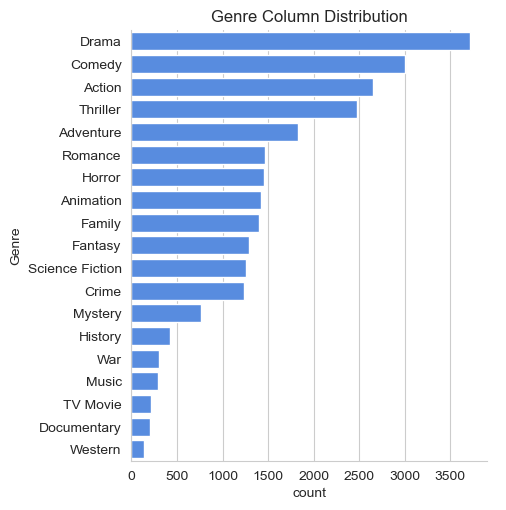

In [97]:
sns.catplot(y ='Genre',data=df,kind ='count',   #  we want in the count format and index from high to low req so we used order index 
            order=df['Genre'].value_counts().index,
            color ='#4287f5')                            # color code for blue we have added here 
plt.title("Genre Column Distribution")                    # added A TITLE for the graph
plt.show()

### 2.which has highest vote in vote avg columns?

In [100]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction
3,2022.0,The Batman,3827.658,1151.0,popular,Crime
4,2022.0,The Batman,3827.658,1151.0,popular,Mystery


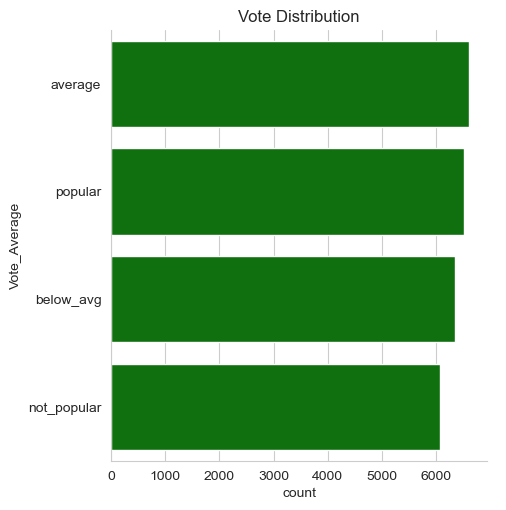

In [102]:
sns.catplot( y="Vote_Average",data = df ,kind ="count",
            order =df["Vote_Average"].value_counts().index,
            color="Green")
plt.title("Vote Distribution")
plt.show()

### 3. Which movie got the heighest popularity?whats its gener?


In [105]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure


In [107]:
df[df["Popularity"]== df["Popularity"].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction


### Which movies got the lowest popularity ?whats its gener?


In [110]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure


In [112]:
df[df["Popularity"] == df["Popularity"].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021.0,The United States vs. Billie Holiday,13.354,152.0,average,Music
25546,2021.0,The United States vs. Billie Holiday,13.354,152.0,average,Drama
25547,2021.0,The United States vs. Billie Holiday,13.354,152.0,average,History
25548,1984.0,Threads,13.354,186.0,popular,War
25549,1984.0,Threads,13.354,186.0,popular,Drama
25550,1984.0,Threads,13.354,186.0,popular,Science Fiction


### which year has the most filmmed movies?

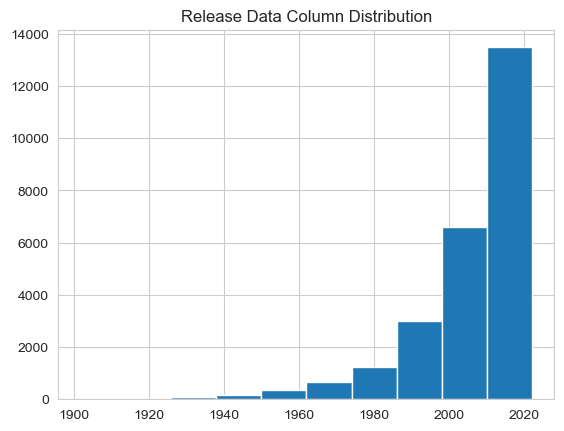

In [115]:
df["Release_Date"].hist()
plt.title("Release Data Column Distribution")
plt.show()

### Summary 

#What is the most frequent gener of movies released on netflix dataset?
Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the time among 19 other genres
#which has highest vote in vote avg columns?
we have 25.5% of our dataset with popular vote(6520=row).Drama again gets the heighest popularity among gans by being having more than 18.5% of movies popularity
#Which movie got the heighest popularity?whats its gener?
Spider-man no way home  has the heightest popularity rate in our dataset and it has genre of action,adventure and sci fiction.
#Which movies got the lowest popularity?whats its gener?
The United States ,thread, has the highest lowest rate in our dataset and it has genres of music,drama,war,sci-fiction and history
#which year has the most filmmed movies?
year 2020 has the heighest filiming rate in our dataset.

### Model Building

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load dataset
# df = pd.read_csv("mymoviedb.csv", engine='python', on_bad_lines='skip')

# # Convert to numeric
# df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce')
# df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')

# Drop missing
df = df.dropna(subset=['Vote_Average', 'Vote_Count', 'Popularity', 'Genre'])

# Features and target
X = df[['Popularity', 'Vote_Count', 'Genre', ]]
y = df['Vote_Average']

# One-hot encode
X = pd.get_dummies(X, columns=['Genre'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


ValueError: could not convert string to float: 'popular'